# **Milestone 1**

`Julio Muhammad Rizki`, `FTDS Batch 003-HCK`

# Objectives

**S** : Menemukan insight yang dapat digunakan developer game agar game yang dikembangkan dapat menghasilkan lebih banyak revenue

**M** : Dapat membuat analisis berdasarkan data yang disediakan

**A** : Menganalisa berdasarkan data, genre, platform, dan region mana saja elemen yang menghasilkan revenue tertinggi

**R** : Menemukan Platform dan Genre Terfavorit untuk menjadikan insight kepada para developer

**T**

**SMART Objective :** Membantu Developer game untuk mendapatkan insight yang dapat meningkatkan hasil penjualan pada game yang mereka akan/sedang kembangkan.


Problem Statement
- Tentukan siapakah Publisher yang paling banyak me-release Game
- Publisher mana yang memiliki tingkat revenue tertinggi
- Genre Game apakah yang paling banyak di-release
- Tahun Berapakah yang paling banyak jumlah releasenya Game dan Genre apakah yang terbanyak
- Genre mana yang memiliki tingkat revenue tertinggi
- Platform mana yang paling banyak menghasilkan revenue
- Genre Game apa yang paling menghasilkan revenue di Setiap Region
- Berapa persentase revenue per-region secara Global
- Region mana yang paling berpengaruh terhadap revenue Global penjualan game
- Apakah tingkat penjualan/revenue Region peringkat 1 dan 2 dapat dikatakan setara

# Library Import, Data Loading, and Data Cleaning

Dashboard : https://datastudio.google.com/reporting/533c10d2-050c-4491-927f-8ab3e6979678

In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

import seaborn as sns
sns.set_style('whitegrid')

# import library yang akan digunakan

Berikut adalah Dataset yang akan digunakan, berdasarkan Video Game Sales. Data merupakan dataset publik yang diambil dari https://www.kaggle.com/datasets/gregorut/videogamesales?datasetId=284&sortBy=voteCount untuk kemudian dilakukan analisis lebih lanjut oleh peneliti.

In [150]:
df = pd.read_csv('vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [151]:
df.tail()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


**Elemen (Kolum) yang digunakan pada Data ini adalah sebagai berikut :**

- Rank - Ranking berdasarkan Global Sales
- Name - Nama Game
- Platform - Platform dari Game tersebut (contoh: PC, PS4, Wii, dll)
- Year - Tahun keluarnya game
- Genre - Genre Game
- Publisher - Publisher yang me-release Game tersebut
- NA_Sales - Penjualan/Revenue di North America (in millions USD)
- EU_Sales - Penjualan/Revenue di Europe (in millions USD)
- JP_Sales - Penjualan/Revenue di Japan (in millions USD)
- Other_Sales - Penjualan/Revenue di Area atau Region lainnya (in millions USD)
- Global_Sales - Total Revenue secara Global.

Berikutnya dilakukan pengecekan terhadap Missing Value.

In [152]:
df.isnull().sum().sort_values(ascending=False)

Year            271
Publisher        58
Rank              0
Name              0
Platform          0
Genre             0
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

Untuk mengisi missing value pada kolom Year, dilakukan dulu pengecekan pada sebaran data apakah normal atau tidak. Jika sebaran data normal maka missing value akan diisi dengan mean, jika tidak normal maka akan diisi dengan median.

Skewness value:  -1.002560494621347


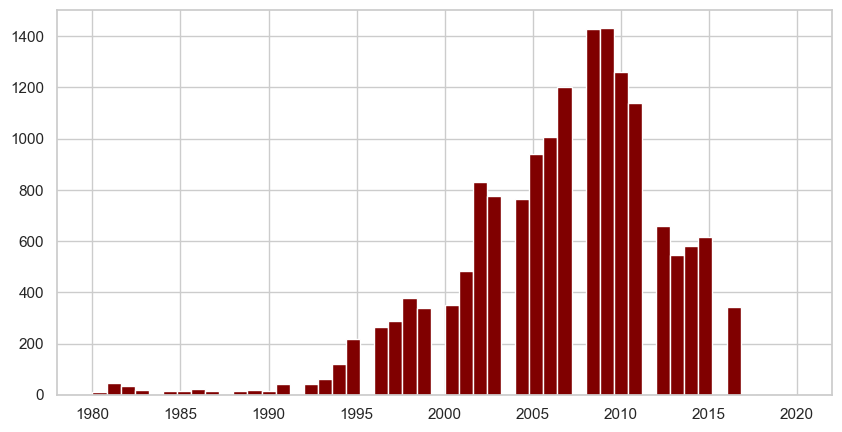

In [153]:
from scipy.stats import skew

print('Skewness value: ', df['Year'].skew())
df['Year'].hist(bins=50, figsize=(10,5), color='maroon')
plt.show()

Karena distribusi data di kolom Year tidak normal, maka missing value akan diisi dengan Median. Sedangkan kolom Publisher akan diisi dengan Modus karena kolom Publisher memiliki tipe data kategori.

In [154]:
df['Year'] = df['Year'].fillna(df['Year'].median())

In [155]:
df['Publisher'] = df['Publisher'].fillna(df['Publisher'].mode()[0])

In [156]:
df.isnull().any()

Rank            False
Name            False
Platform        False
Year            False
Genre           False
Publisher       False
NA_Sales        False
EU_Sales        False
JP_Sales        False
Other_Sales     False
Global_Sales    False
dtype: bool

Karena sudah tidak ada missing value, analisis dapat dilanjutkan.

In [157]:
df.nunique()

Rank            16598
Name            11493
Platform           31
Year               39
Genre              12
Publisher         578
NA_Sales          409
EU_Sales          305
JP_Sales          244
Other_Sales       157
Global_Sales      623
dtype: int64

Dari data ini, diketahui bahwa terdapat:
- 11.493 Judul **Game** 
- yang diterbitkan dari 578 **Publisher** 
- kepada 31 Jenis **Platform** 
- dengan 12 macam **Genre**.

# Working Area

**Peringkat Publisher berdasarkan yang paling banyak me-release Game**

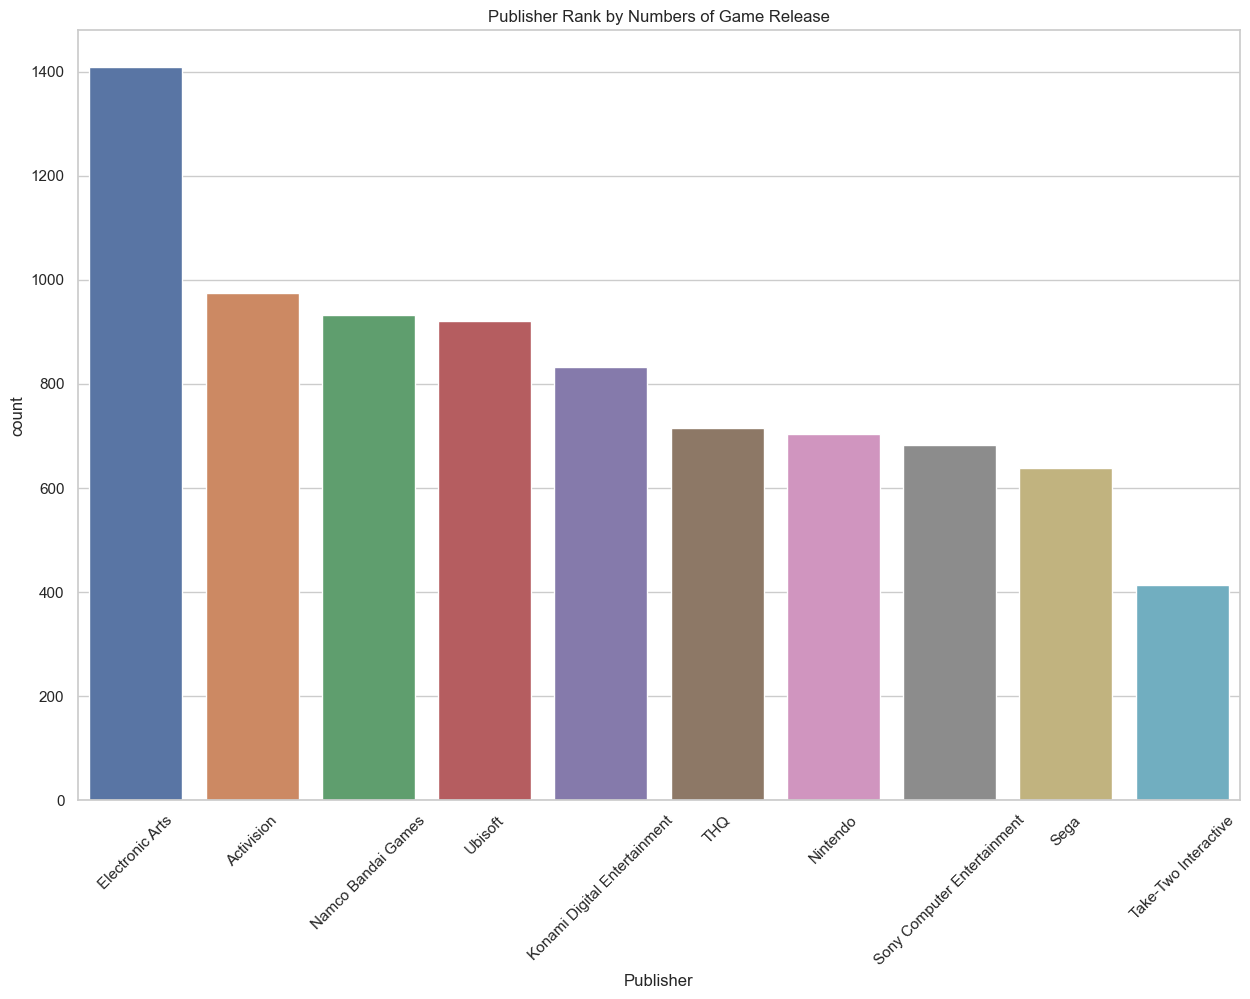

In [158]:
plt.figure(figsize=(15, 10))
sns.countplot(x="Publisher", data=df, order = df['Publisher'].value_counts(ascending=False).iloc[:10].index)
plt.xticks(rotation=45)
plt.title('Publisher Rank by Numbers of Game Release')

plt.show()

Berdasarkan Data, Publisher yang paling banyak me-release game selama ini adalah EA (Electronic Arts), Activision, dan Bandai (Namco Bandai Games) secara berurutan. Activision dan Bandai memiliki jumlah yang tidak terlalu jauh, namun EA menduduki peringkat 1 secara margin yang signifikan, 1400an terhadap 900an total Game.

**Publisher mana yang memiliki tingkat revenue tertinggi**

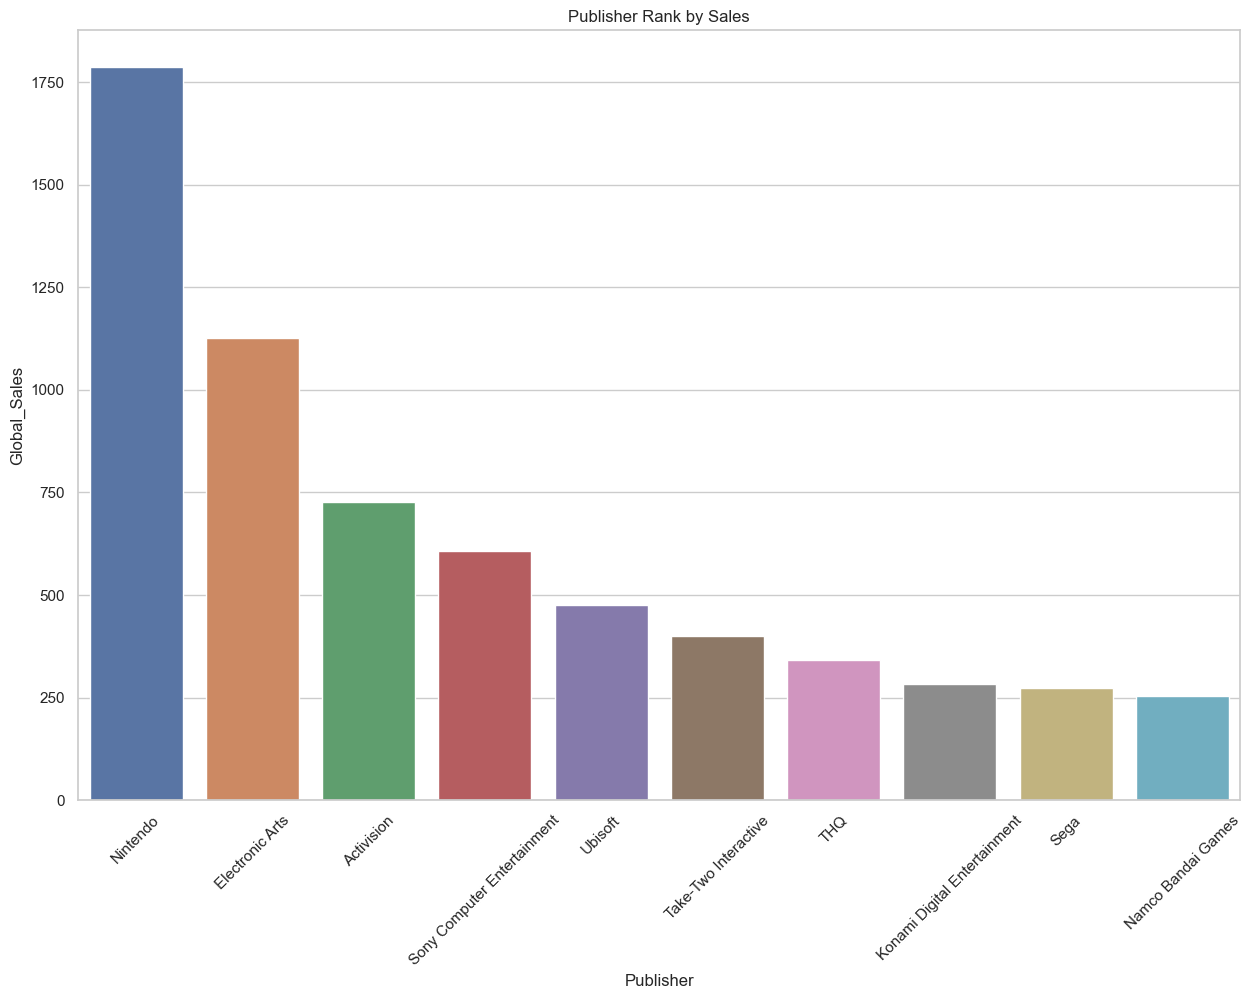

In [159]:
publ_sales = df[['Publisher', 'Global_Sales']]
publ_sales = publ_sales.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(10)
publ_sales = pd.DataFrame(publ_sales).reset_index()

plt.figure(figsize=(15, 10))
sns.barplot(x='Publisher', y='Global_Sales', data=publ_sales)
plt.xticks(rotation=45)
plt.title('Publisher Rank by Sales')
plt.show()

Namun jika dilihat dari revenue, Nintendo memiliki pendapatan yang jauh berada diatas para pesaingnya, walau jika dilihat dari jumlah game yang di-release Nintendo hanya berada pada peringkat ke 7. Bahkan EA yang memiliki jumlah judul Game terbanyak tidak mampu mengalahkan Nintendo secara revenue.

**Genre Game apakah yang paling banyak di-release**

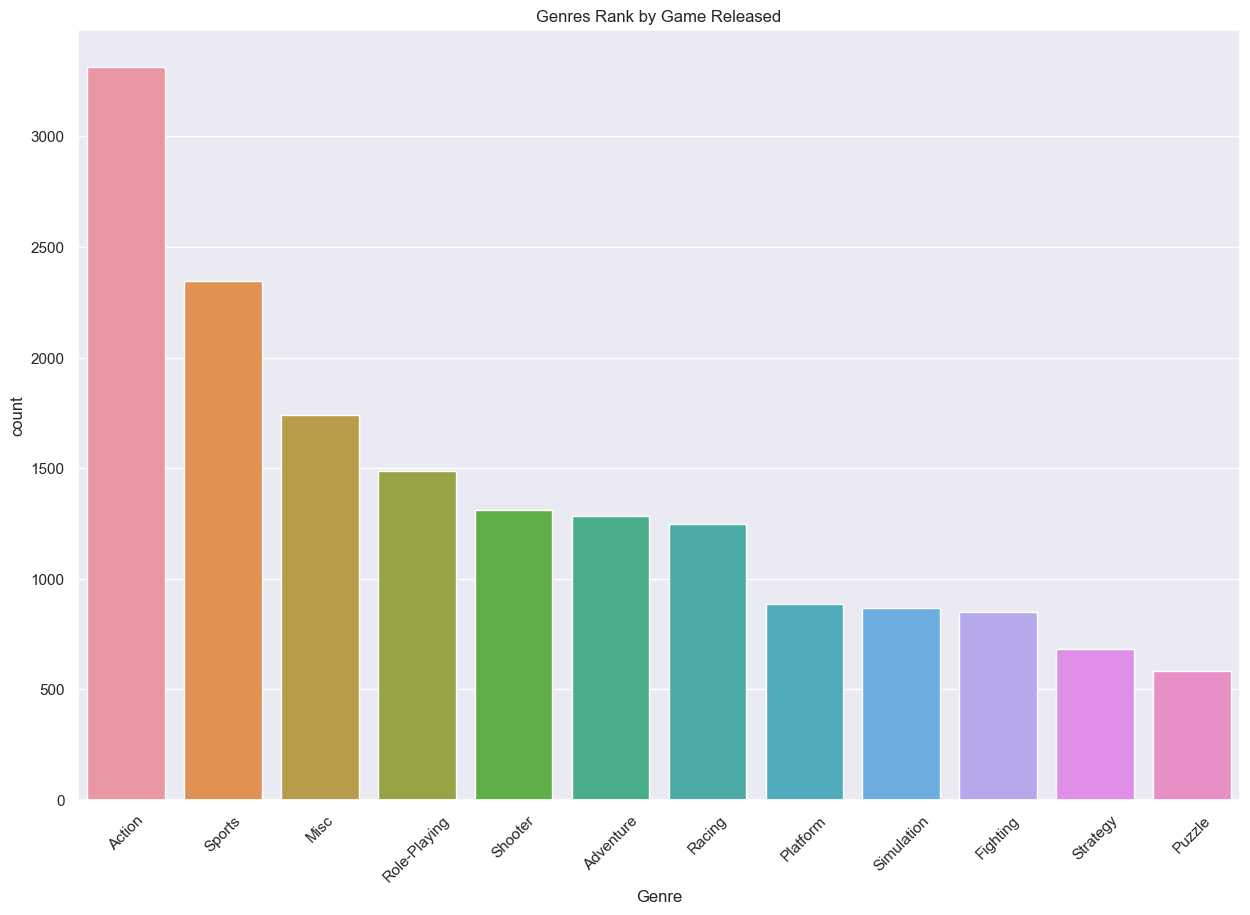

In [171]:
plt.figure(figsize=(15, 10))
sns.countplot(x="Genre", data=df, order = df['Genre'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Genres Rank by Game Released')

plt.show()

Berdasarkan Genre, yang paling banyak di release adalah Game dengan Genre Action dan Sports.

**Tahun Berapakah yang paling banyak jumlah releasenya Game dan Genre apakah yang terbanyak**

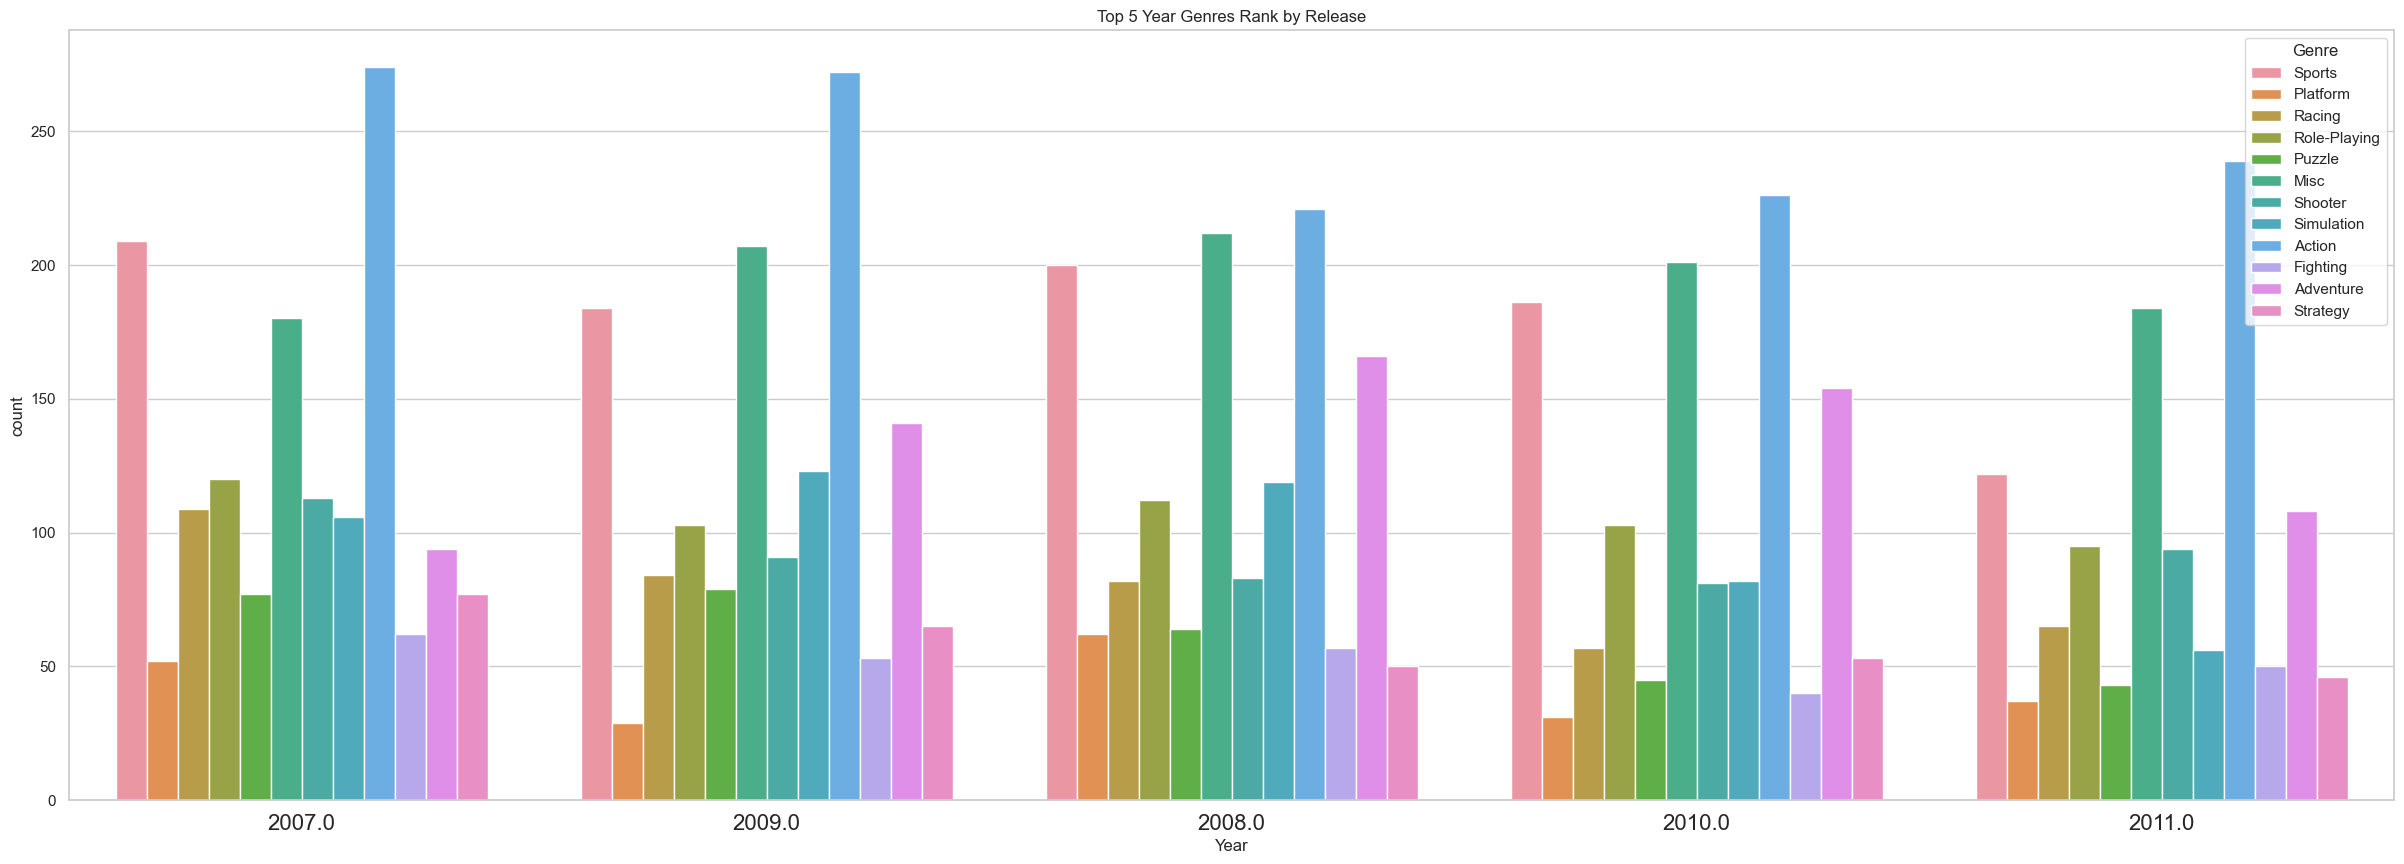

In [161]:
plt.figure(figsize=(30, 10))
sns.countplot(x="Year", data=df, hue='Genre', order=df.Year.value_counts().iloc[:5].index)
plt.xticks(size=16)
plt.title('Top 5 Year Genres Rank by Release')
plt.show()

2007 merupakan puncak terbanyak jumlah Game yang di release di tahun yang sama. Diikuti tahun lainnya, 5 tahun tingkat teratas memliki kesamaan yaitu Genre Action, Sports, dan Shooter merupakan game yang paling banyak di-release di tahun-tahun tersebut. Namun di setiap tahun tersebut, genre Action selalu mendominan di peringkat pertama.

**Genre mana yang memiliki tingkat revenue tertinggi**

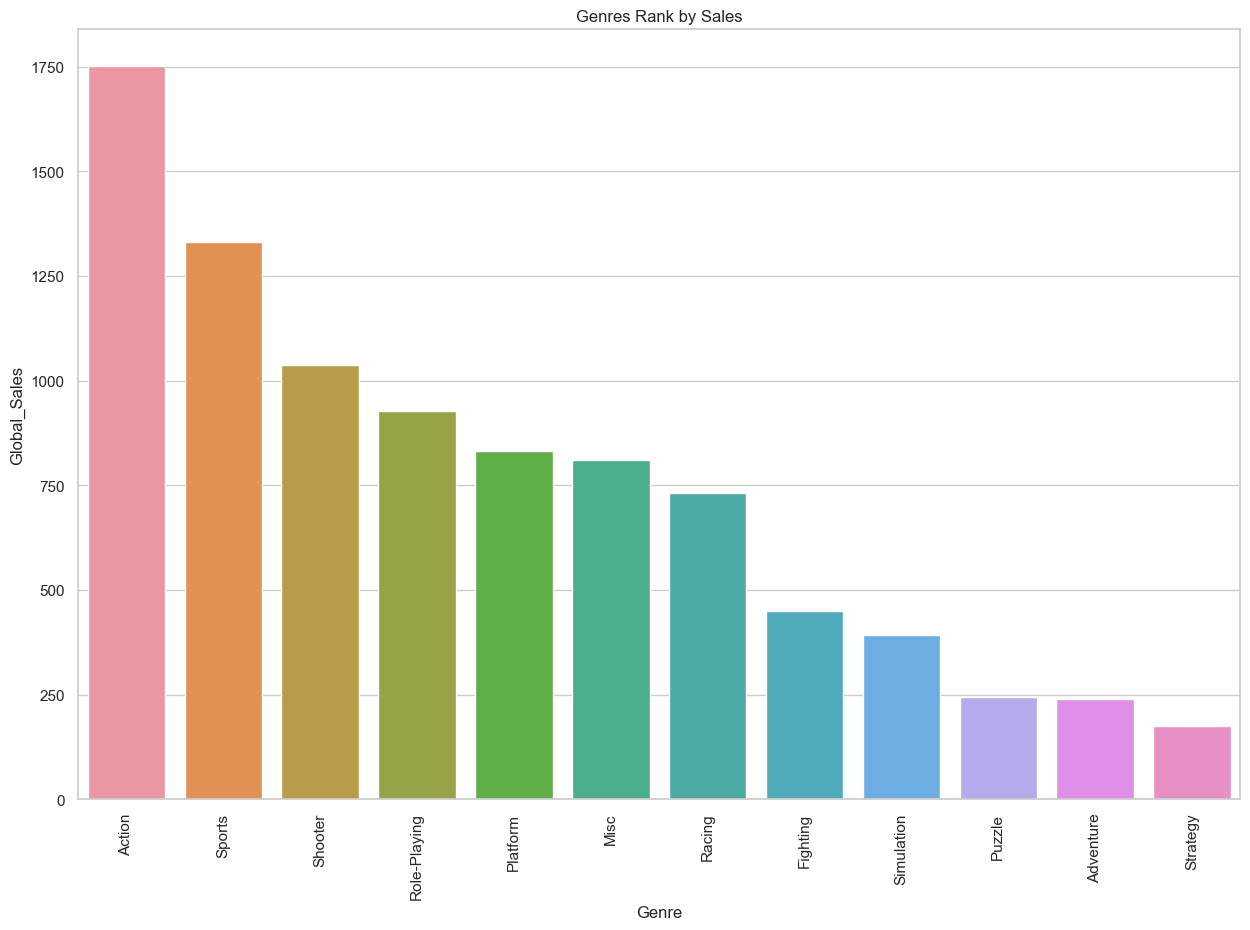

In [162]:
genre_sales = df.groupby(by=['Genre'])['Global_Sales'].sum()
genre_sales = genre_sales.reset_index()
genre_sales = genre_sales.sort_values(by=['Global_Sales'], ascending=False)

plt.figure(figsize=(15, 10))
sns.barplot(x="Genre", y="Global_Sales", data=genre_sales)
plt.xticks(rotation=90)
plt.title('Genres Rank by Sales')
plt.show()

Action & Sports sekali lagi berada di peringkat atas, namun secara Sales, genre Shooter ada di peringkat 3. Dibandingkan total jumlah Judul Gamenya yang ada di peringkat 5, Genre shooter menunjukkan bahwa para penikmat Genre ini lebih rela menghabiskan uang sakunya untuk Game-Game kesukaannya dibandingkan penikmat Genre Role-Playing dan Misc.

**Platform mana yang paling banyak menghasilkan revenue**

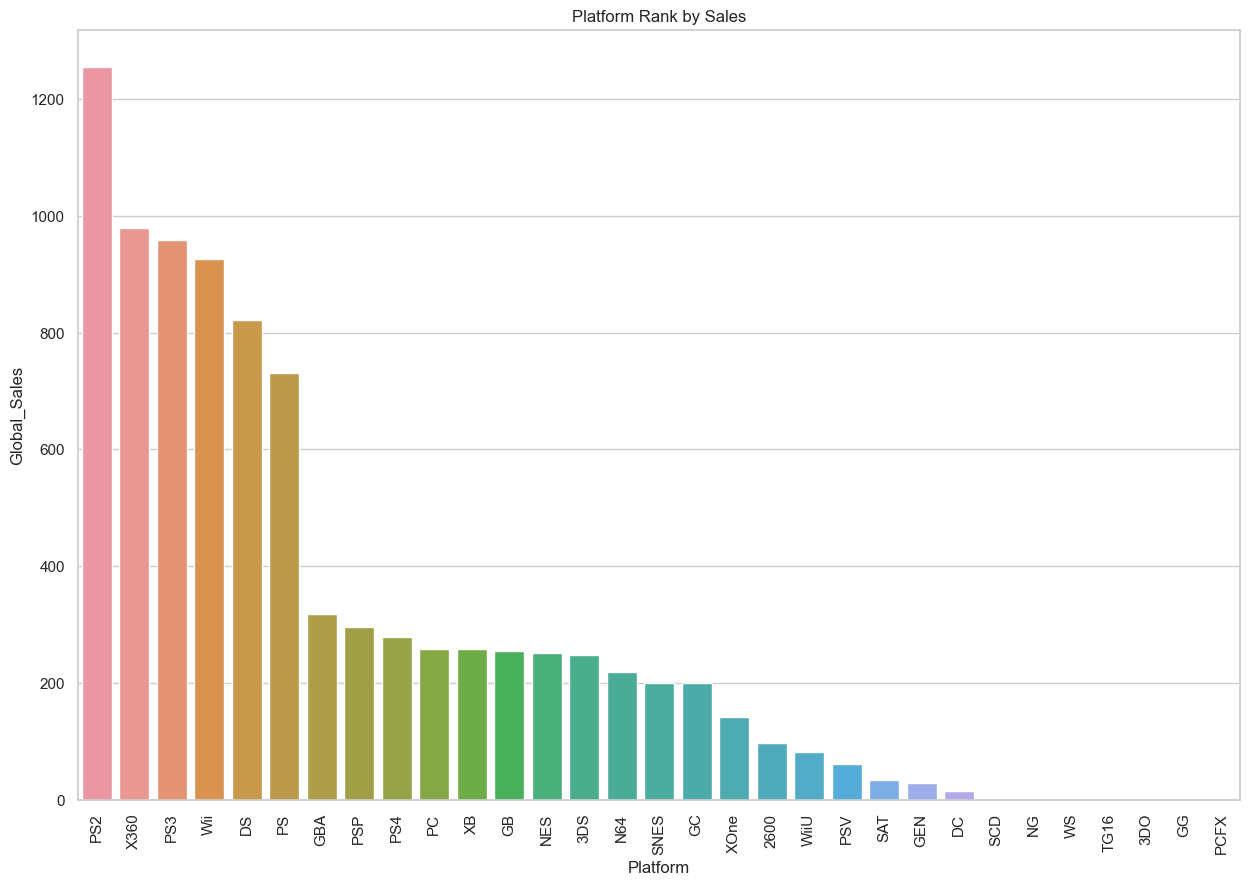

In [163]:
platform_sales = df.groupby(by=['Platform'])['Global_Sales'].sum()
platform_sales = platform_sales.reset_index()
platform_sales = platform_sales.sort_values(by=['Global_Sales'], ascending=False)

plt.figure(figsize=(15, 10))
sns.barplot(x="Platform", y="Global_Sales", data=platform_sales)
plt.xticks(rotation=90)
plt.title('Platform Rank by Sales')
plt.show()

PS2 merupakan platform dengan jumlah revenue tertinggi dengan angka 1200 jt USD. 16 Tahun hidupnya di industri game menunjukkan bahwa PS2 cukup berhasil jika dibandingkan dengan para pesaingnya di generasi yang sama. Bahkan platform generasi baru seperti XBOX 360, PS3, Nintendo Wii, dan Nintendo DS yang keluar sejak tahun 2004-2006 belum mampu menggeser kejayaan dari PS2

**Genre Game apa yang paling menghasilkan revenue di Setiap Region**

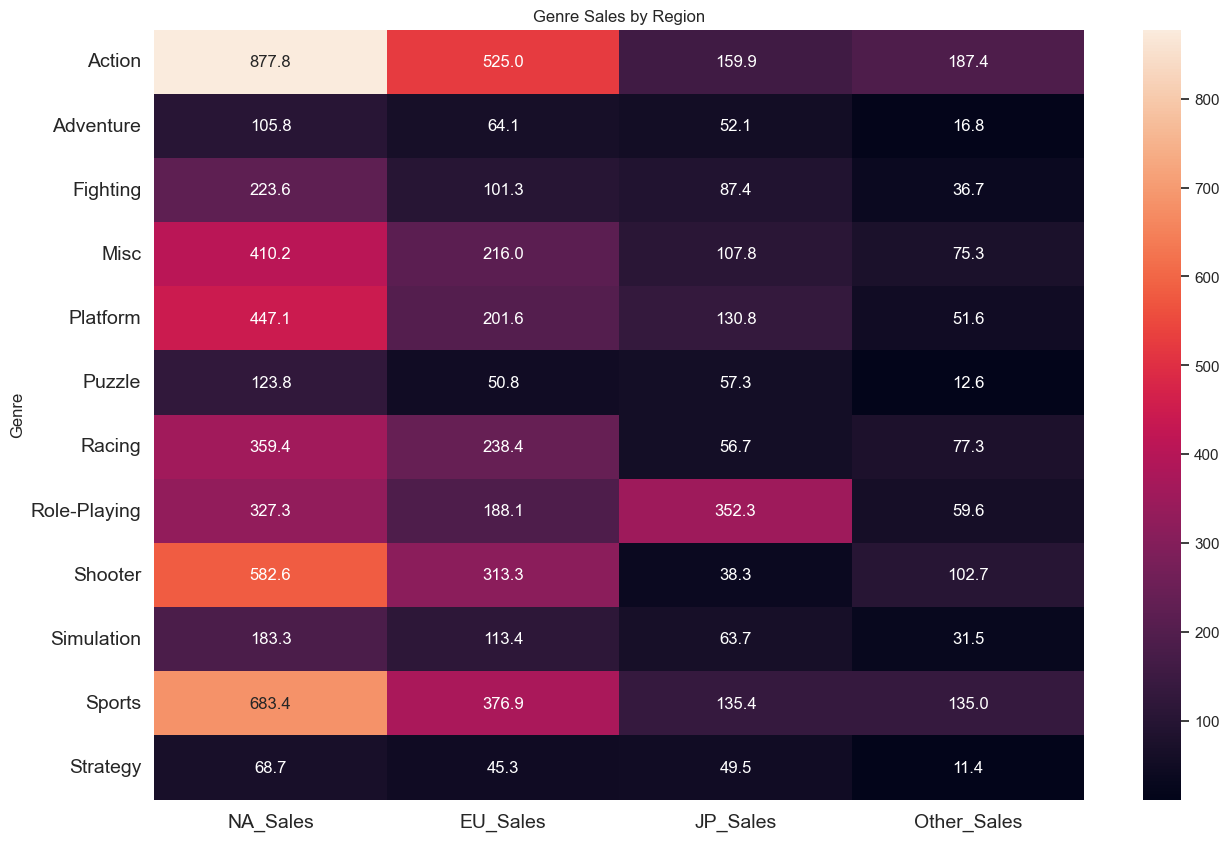

In [164]:
region_genre = df[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
region_heatmap = region_genre.groupby(by=['Genre']).sum()

plt.figure(figsize=(15, 10))
sns.set(font_scale=1)
sns.heatmap(region_heatmap, annot=True, fmt = '.1f')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Genre Sales by Region')
plt.show()

Pada  Region North America, Europe, dan gabungan region lainnya, genre yang paling populer adalah Action, Sports, dan Shooter. Namun pada region Japan, genre terpopuler adalah RPG(Role Playing), Action dan Sports.

**Berapa persentase revenue per-region secara Global**

In [165]:
region_sales = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
region_sales = region_sales.sum().reset_index()
region_sales = region_sales.rename(columns={"index": "region", 0: "sale"})
region_sales

,region,sale
0,NA_Sales,4392.95
1,EU_Sales,2434.13
2,JP_Sales,1291.02
3,Other_Sales,797.75


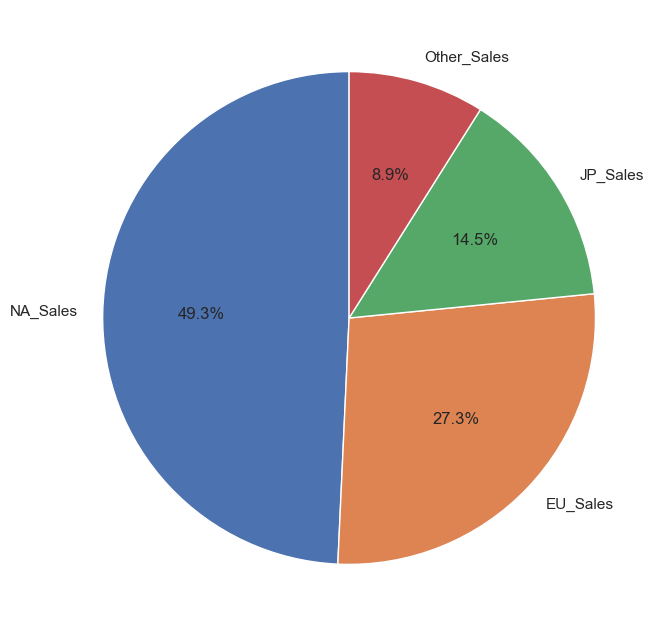

In [166]:
labels = region_sales['region']
sizes = region_sales['sale']
plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.show()

Revenue yang dihasilkan secara Global didominasi pada penjualan game di North America dengan hampir setengah dari penjualan secara Global.

**Region mana yang paling berpengaruh terhadap revenue Global penjualan game**

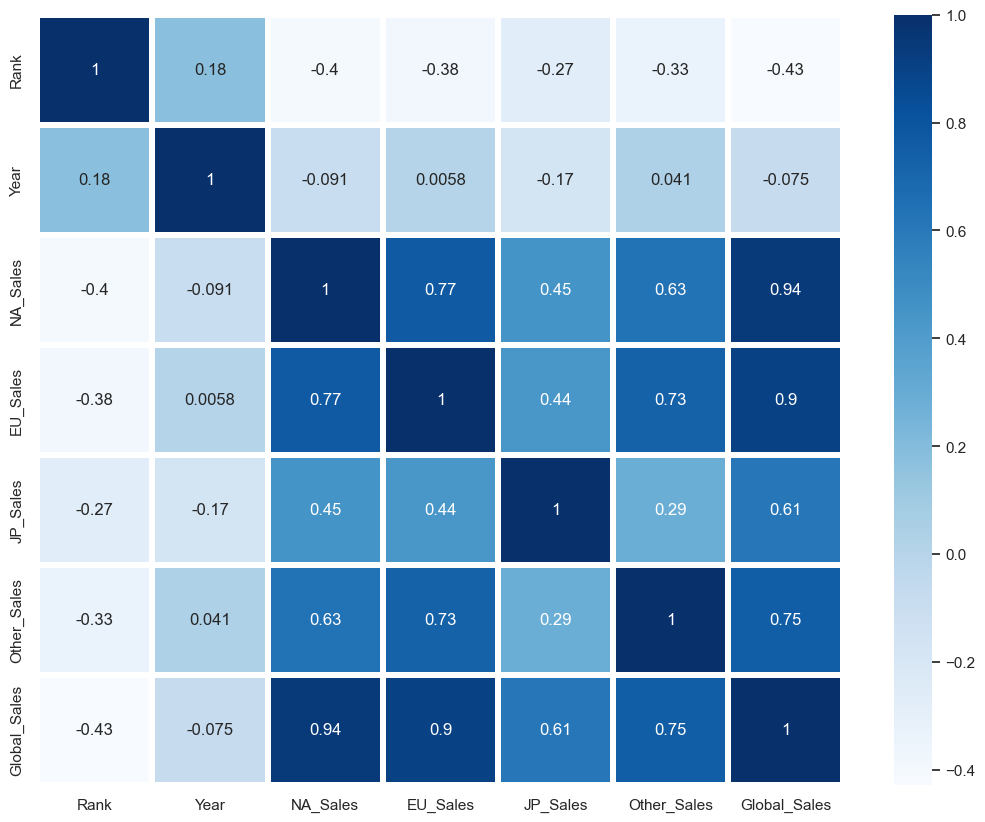

In [167]:
plt.figure(figsize=(13,10))
sns.heatmap(df.corr(), cmap = "Blues", annot=True, linewidth=3)
plt.show()

Penjualan pada North America dan Europe memiliki pengaruh yang sangat besar terhadap penjualan secara Global. Tingkat penjualan region lain juga cukup berkorelasi terhadap Global Sales. Penjualan North America dan Europa khususnya saling berkorelasi satu sama lain.

**Apakah tingkat penjualan/revenue Region peringkat 1 dan 2 dapat dikatakan setara**

Peneliti ingin menganalisa apakah rata-rata penjualan pada peringkat 1 dan 2, North America dan Europe berbeda secara signifikan atau dapat dikatakan setara.

Untuk menguji hal tersebut, maka peneliti membuat hipotesis sebagai berikut:

- H0 = Rata-Rata Revenue Europa  = Rata-Rata Revenue North America
- H1 = Rata-Rata Revenue Europa != Rata-Rata Revenue North America

In [168]:
na_sales = df['NA_Sales']
eu_sales = df['EU_Sales']

In [169]:
t_stat, p_val = stats.ttest_ind(eu_sales, na_sales)


print('P-value:',p_val)
print('t-statistics:',t_stat)

P-value: 3.0384925458015177e-56
t-statistics: -15.831371100049914


-0.8438182065995183


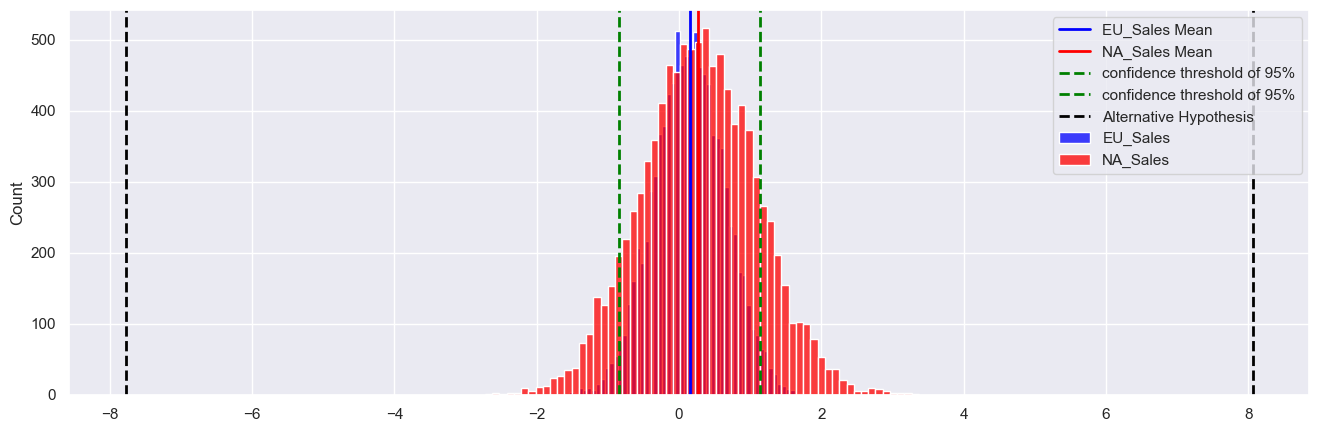

In [170]:
eu_sales_pop = np.random.normal(eu_sales.mean(),eu_sales.std(),10000)
na_sales_pop = np.random.normal(na_sales.mean(),na_sales.std(),10000)

ci = stats.norm.interval(0.95, eu_sales.mean(), eu_sales.std())

plt.figure(figsize=(16,5))
sns.histplot(eu_sales_pop, label='EU_Sales',color='blue')
sns.histplot(na_sales_pop, label='NA_Sales',color='red')

plt.axvline(eu_sales.mean(), color='blue', linewidth=2, label='EU_Sales Mean')
plt.axvline(na_sales.mean(), color='red',  linewidth=2, label='NA_Sales Mean')

plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')
plt.axvline(ci[0], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')

plt.axvline(eu_sales_pop.mean()+t_stat*eu_sales_pop.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis')
plt.axvline(eu_sales_pop.mean()-t_stat*eu_sales_pop.std(), color='black', linestyle='dashed', linewidth=2)

plt.legend()
print(ci[0])

Berdasarkan uji hipotesis, hasil dari p-value antara Sales dari kedua Region tersebut adalah 3.0384925458015177e-56 yang berarti H0 di reject. Ini berarti Rata-Rata Revenue dari kedua region tersebut berbeda secara signifikan atau tidak setara satu sama lain.

# Overall Analysis

- Sampai saat ini EA, Activision, dan Bandai merupakan Big 3 dalam jumlah pengembangan Game.
- Namun dari segi penjualan, game yang dihasilkan Nintendo merupakan penghasil revenue tertinggi.
- Action, Sports, dan Shooter adalah Game yang menghasilkan revenue terbanyak. Terlihat juga dari jumlah gamenya yang lebih banyak di release oleh ara Publisher
- Game Action selalu menjadi andalan Publisher di beberapa tahun puncak kelahiran game.
- PS2 adalah platform yang paling menghasilkan revenue di penjualan game dibanding platform game lainnya di Generasi yang lebih baru.
- Hampir pada semua Region, genre terpopuler adalah Action, namun pada Region Jepang, genre terpopuler berdasarkan revenue adalah RPG.
- Sales pada setiap Region berkolerasi terhadap Global Sales, namun yang paling berpengaruh adalah Sales pada North America dan Europe.
- Terdapat perbedaan yang cukup signifikan pada peringkat 1 dan 2 pendapatan game berdasarkan region, yaitu NA dan EU.